# <font color ='545aa7'> Chapter 5: Pandas </font>

From **Scientific Computing for Chemists** by Charles Weiss. The document is copyright © 2021 Charles J. Weiss and is released under under the [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

In [99]:
nums = [1, 2, 3, 'four', 5, 'six', 7.0]

In [100]:
import numpy as np
np.array(nums)

array(['1', '2', '3', 'four', '5', 'six', '7.0'], dtype='<U32')

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 5.1 Basic Pandas Objects
### 5.1.1 Series

In [102]:
mass = pd.Series([1.01,4.00,6.94,9.01,10.81])
mass

0     1.01
1     4.00
2     6.94
3     9.01
4    10.81
dtype: float64

In [103]:
mass[2]

6.94

In [104]:
mass2 = pd.Series([1.01,4.00,6.94,9.01,10.81],
index=('H', 'He', 'Li', 'Be', 'B'))
mass2

H      1.01
He     4.00
Li     6.94
Be     9.01
B     10.81
dtype: float64

In [105]:
mass2['He']

4.0

In [106]:
mass.index =['H', 'He', 'Li', 'Be', 'B']
mass

H      1.01
He     4.00
Li     6.94
Be     9.01
B     10.81
dtype: float64

In [107]:
mass2.iloc[2]

6.94

### 5.1.2 DataFrame

In [108]:
name = ['hydrogen', 'helium', 'lithium', 'beryllium','boron']
AN = [1,2,3,4,5]
mass = [1.01,4.00,6.94,9.01,10.81]
IE = [13.6, 24.6, 5.4, 9.3, 8.3]

In [109]:
elements = pd.DataFrame([name, AN, mass, IE], columns=['H', 'He', 'Li', 'Be','B'], index=['name', 'AN', 'mass', 'IE'])
elements

H      He       Li         Be      B
name  hydrogen  helium  lithium  beryllium  boron
AN           1       2        3          4      5
mass      1.01     4.0     6.94       9.01  10.81
IE        13.6    24.6      5.4        9.3    8.3

In [110]:
elements['Li']

name    lithium
AN            3
mass       6.94
IE          5.4
Name: Li, dtype: object

In [111]:
elements.loc['IE']

H     13.6
He    24.6
Li     5.4
Be     9.3
B      8.3
Name: IE, dtype: object

In [112]:
atomic_number = elements.loc['AN']

In [113]:
atomic_number['B']

5

In [114]:
elements.loc['IE', 'Li']

5.4

In [115]:
elements.iloc[2:, 2]

mass    6.94
IE       5.4
Name: Li, dtype: object

## 5.2 Reading/Writing Data
### 5.2.1 General-Purpose Delimited File Reader

In [116]:
benz = pd.read_table('benzene.pdb', delim_whitespace=True, skiprows=2, skipfooter=13, header=None)

/Users/Demos/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [117]:
benz

0   1  2    3  4    5      6      7
0   HETATM   1  H  UNK  1  0.0  0.000 -0.020
1   HETATM   2  C  UNK  1  0.0  0.000  1.067
2   HETATM   3  C  UNK  1  0.0  0.000  3.857
3   HETATM   4  C  UNK  1  0.0 -1.208  1.764
4   HETATM   5  C  UNK  1  0.0  1.208  1.764
5   HETATM   6  C  UNK  1  0.0  1.208  3.159
6   HETATM   7  C  UNK  1  0.0 -1.208  3.159
7   HETATM   8  H  UNK  1  0.0 -2.149  1.221
8   HETATM   9  H  UNK  1  0.0  2.149  1.221
9   HETATM  10  H  UNK  1  0.0  2.149  3.703
10  HETATM  11  H  UNK  1  0.0 -2.149  3.703
11  HETATM  12  H  UNK  1  0.0  0.000  4.943

### 5.2.2 Comma Separated Values Files

In [118]:
elements.to_csv('elements.csv')

In [119]:
pd.read_csv('elements.csv')

Unnamed: 0         H      He       Li         Be      B
0       name  hydrogen  helium  lithium  beryllium  boron
1         AN         1       2        3          4      5
2       mass      1.01     4.0     6.94       9.01  10.81
3         IE      13.6    24.6      5.4        9.3    8.3

### 5.2.3 Excel Notebook Files

In [120]:
pd.read_excel('test.xls')

x   y
0  1   1
1  2   4
2  3   9
3  4  16
4  5  25
5  6  36
6  7  49

In [121]:
data = pd.read_excel('test.xls', sheet_name='Sheet2')
data

a         b  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0  1  0.841471         NaN         NaN         NaN         NaN         NaN   
1  2  0.909297         NaN         NaN         NaN         NaN         NaN   
2  3  0.141120         NaN         NaN         NaN         NaN         NaN   
3  4 -0.756802         NaN         NaN         NaN         NaN         NaN   
4  5 -0.958924         NaN         NaN         NaN         NaN         NaN   
5  6 -0.279415         NaN         NaN         NaN         NaN         NaN   
6  7  0.656987         NaN         NaN         NaN         NaN         NaN   
7  8  0.989358         NaN         NaN         NaN         NaN         NaN   
8  9  0.412118         NaN         NaN         NaN         NaN         NaN   

   b.1  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  
5  NaN  
6  NaN  
7  NaN  
8  NaN

In [122]:
xl = pd.ExcelFile('test.xls')
xl.sheet_names

['Sheet1', 'Sheet2']

In [123]:
writer = pd.ExcelWriter('new_file.xlsx')
data.to_excel(writer, 'First Sheet')
writer.save()

### 5.2.4 Computer Clipboard

## 5.3 Examining Data with Pandas
### 5.3.1 Descriptive Functions

In [124]:
random = pd.DataFrame({'even': np.random.rand(1000),
                       'normal': np.random.randn(1000),
                       'poisson': np.random.poisson(
                        lam=3.0, size=1000)})

In [125]:
random.head()

even    normal  poisson
0  0.731028 -1.939012        3
1  0.215625 -1.239067        4
2  0.213599 -0.261548        1
3  0.562719 -1.427230        3
4  0.652335  0.186377        3

In [126]:
random.tail()

even    normal  poisson
995  0.173645 -1.047446        4
996  0.605050  0.106361        4
997  0.299051 -0.211506        4
998  0.372358  0.768830        3
999  0.181365  0.622388        3

In [127]:
random.describe()

even       normal      poisson
count  1000.000000  1000.000000  1000.000000
mean      0.492473     0.008774     3.083000
std       0.285513     1.014455     1.698528
min       0.001181    -3.468885     0.000000
25%       0.252706    -0.649420     2.000000
50%       0.484450    -0.009358     3.000000
75%       0.733761     0.637403     4.000000
max       0.997886     2.737509    10.000000

In [128]:
counts = random['poisson'].value_counts()
counts

3     226
2     222
4     194
1     141
5      98
6      47
0      36
7      22
8       9
9       4
10      1
Name: poisson, dtype: int64

<AxesSubplot:>

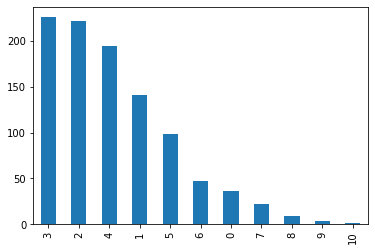

In [129]:
counts.plot(kind='bar')

### 5.3.2 Broadcasted Mathematical Operations

## 5.4 Modifying DataFrames
### 5.4.1 Insert Columns via Assignment

In [130]:
elements

H      He       Li         Be      B
name  hydrogen  helium  lithium  beryllium  boron
AN           1       2        3          4      5
mass      1.01     4.0     6.94       9.01  10.81
IE        13.6    24.6      5.4        9.3    8.3

In [131]:
elements['C'] = ['carbon', 6, 12.01, 11.3]
elements

H      He       Li         Be      B       C
name  hydrogen  helium  lithium  beryllium  boron  carbon
AN           1       2        3          4      5       6
mass      1.01     4.0     6.94       9.01  10.81   12.01
IE        13.6    24.6      5.4        9.3    8.3    11.3

In [132]:
nitrogen = pd.Series([7, 14.01, 'nitrogen', 14.5], index=['AN', 'mass', 'name', 'IE'])
nitrogen

AN             7
mass       14.01
name    nitrogen
IE          14.5
dtype: object

In [133]:
elements['N'] = nitrogen
elements

H      He       Li         Be      B       C         N
name  hydrogen  helium  lithium  beryllium  boron  carbon  nitrogen
AN           1       2        3          4      5       6         7
mass      1.01     4.0     6.94       9.01  10.81   12.01     14.01
IE        13.6    24.6      5.4        9.3    8.3    11.3      14.5

### 5.4.3 Dropping Columns

In [134]:
elements.drop('H', axis=1)

He       Li         Be      B       C         N
name  helium  lithium  beryllium  boron  carbon  nitrogen
AN         2        3          4      5       6         7
mass     4.0     6.94       9.01  10.81   12.01     14.01
IE      24.6      5.4        9.3    8.3    11.3      14.5

In [135]:
elements.drop('IE', axis=0)

H      He       Li         Be      B       C         N
name  hydrogen  helium  lithium  beryllium  boron  carbon  nitrogen
AN           1       2        3          4      5       6         7
mass      1.01     4.0     6.94       9.01  10.81   12.01     14.01

### 5.4.4 Merge

In [136]:
chemdata1 = [['MW', 58.08, 32.04], ['dipole', 2.91, 1.69], ['formula', 'C3H6O', 'CH3OH']] 
columns=['property','acetone', 'methanol']
chmdf1 = pd.DataFrame(chemdata1, columns=columns)

In [137]:
chmdf1

property acetone methanol
0       MW   58.08    32.04
1   dipole    2.91     1.69
2  formula   C3H6O    CH3OH

In [138]:
chmdata2 = [['formula', 'C6H6', 'H2O'], ['dipole', 0.00, 1.85], ['MW', 78.11, 18.02]]
chmdf2 = pd.DataFrame(chmdata2 , columns=['property', 'benzene', 'water'])

In [139]:
chmdf2

property benzene  water
0  formula    C6H6    H2O
1   dipole     0.0   1.85
2       MW   78.11  18.02

In [140]:
chmdf1.merge(chmdf2)

property acetone methanol benzene  water
0       MW   58.08    32.04   78.11  18.02
1   dipole    2.91     1.69     0.0   1.85
2  formula   C3H6O    CH3OH    C6H6    H2O

In [141]:
comps1 = pd.DataFrame({'element':['Co', 'Fe', 'Cr','Ni'], 'protons': [27, 26, 24, 28]})
comps2 = pd.DataFrame({'metal':['Fe', 'Co', 'Cr', 'Ni'], 'IE': [7.90, 7.88, 6.79, 7.64]})

In [142]:
comps1.merge(comps2, left_on='element',right_on='metal')

element  protons metal    IE
0      Co       27    Co  7.88
1      Fe       26    Fe  7.90
2      Cr       24    Cr  6.79
3      Ni       28    Ni  7.64

### 5.4.5 Concatenation

In [143]:
group1 = pd.DataFrame({'metal':['Mg', 'Al', 'Ti', 'Fe'], 'density': [1.77, 2.73, 4.55, 7.88]})
group2 = pd.DataFrame({'metal':['Al', 'Mg', 'Ti', 'Fe'], 'density': [2.90, 1.54, 4.12, 8.10]})

In [144]:
group1

metal  density
0    Mg     1.77
1    Al     2.73
2    Ti     4.55
3    Fe     7.88

In [145]:
pd.concat((group1, group2))

metal  density
0    Mg     1.77
1    Al     2.73
2    Ti     4.55
3    Fe     7.88
0    Al     2.90
1    Mg     1.54
2    Ti     4.12
3    Fe     8.10

In [146]:
pd.concat((group1, group2), axis=1)

metal  density metal  density
0    Mg     1.77    Al     2.90
1    Al     2.73    Mg     1.54
2    Ti     4.55    Ti     4.12
3    Fe     7.88    Fe     8.10

In [147]:
pd.merge(group1, group2, on='metal')

metal  density_x  density_y
0    Mg       1.77       1.54
1    Al       2.73       2.90
2    Ti       4.55       4.12
3    Fe       7.88       8.10

# Exercises

1. Below is a table containing the melting points and boiling points of multiple common chemical solvents.

|  Solvent  |  bp  |  mp  |
|  :------: | :--: | :--: |
|benzene  | 80 | 6 |
|acetone | 56 | -95 |
| toluene | 111 | -95 |
| pentane |  36 | -130 |
| ether | 35 | -116 |
| ethanol | 78 | -114 |
| methanol | 65 | -98 |

a) Create a Series containing the boiling points of the above solvents with the solvent names as the indices. Call the Series to look up the boiling point of ethanol.

b)  Create a DataFrame that contains both the boiling points and melting points with
 the solvent names as the indices. Call the DataFrame to look up the melting point
 of benzene.
 
c) Access the boiling point of pentane in the DataFrame from part b using numerical indices.

2. Import the attached file **blue1.csv** containing the absorption spectrum of Blue 1 food dye using pandas.

a) Set the wavelengths as the index values.
         
b) Plot the absorption versus wavelength.
         
c) Determine the absorbance of Blue 1 at 620 nm.

3. Chemical Kinetics: Import the file **kinetics.csv** containing time series data for the conversion of A $\rightarrow$ Product using pandas IO tools. Generate new columns for $ln[A]$, $[A]^{-1}$, and $[A]^{0.5}$ and determine the order of the reaction

4. Import the **ROH_data.csv** file containing data on various simple alcohols to a DataFrame. Notice that this data is missing densities for some of the compounds. 

a) Use pandas to remove any rows with incomplete information in the density column using the pd.dropna() function. Check the DataFrame to see if it has changed.

b) Again using the pd.dropna() function, drop incomplete row with the parameter inplace=True. Check to see if the DataFrame has changed.

5. Import the following four files containing UV-vis spectra of four food dyes with the first column listing the wavelengths (nm) and the second column containing the absorbances. Each file contains data in from 400-850 nm in 1 nm increments.

$$ red40.csv \quad green3.csv \quad  blue1.csv \quad yellow6.csv $$

a) Concatenation the files into a single DataFrame with the first column as the wavelength (nm) and the other four columns as the absorbances for each dye.

b) Replace the column headers with meaningful labels.

6. Import the two files **alcohols.csv** and **alkanes.csv** containing the boiling points of the two classes of organic compounds with respect to the number of carbons in each compound.

a) Drop the columns containing the names of the compounds.

b) Merge the two DataFrames allowing pandas to align the two DataFrames based on carbon number.